## Synthesis HHE intensity and HHW frequency (Fig 2)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import rc
import xarray as xr
from matplotlib import cm
from matplotlib.ticker import MaxNLocator

### Figure storage

In [2]:
dirout= "./figures/"

### Figure 2 - without French Guiana -- only islands

In [6]:
def fig2():
    
    
    '''
    This method generates a figure in six subplots.
    10-y return levels for the period 2090-2100
    Humid heatwave frequency (days/year) according to Method 1 and Method 2 (see the paper), for period 2090-2100
    Two scenarios : SSP2-4.5 and SSP5-8.5
    Here the results for 17 islands stations are displayed.
    
    '''
    

    latitudes=[9.806,12.8055,13.2398,14.3078,14.456833,14.595333,15.8876,16.264,17.555167,17.9015,20.558667,20.777667,
           20.892167,22.017333,22.276009,23.130167,27.618333]

    Scenarios=["ssp245","ssp585"]


    rc('text', usetex=True)# text in LateX
    
    all_stations=["Hiva-oa","Pamandzi","Hihifo","Maopoopo","Takaroa","Lamentin","Tromelin",
                 "Raizet","Faaa","Saint-Barthelemy","Koumac","Ouanaham","Gillot","Tontouta","Noumea",
                 "Mangareva","Rapa"] #island stations
    
    
    fig, axs = plt.subplots(nrows=3, ncols=2,
                                sharex=True,
                                #sharey=True,
                                figsize=(9,11.25))

    for scenario in Scenarios:
        
        
        #parameters for all subplots
        
        if scenario == 'ssp245':
            ind_col=0
            color=(247/256,148/256,32/256)
            scenario_title="SSP2-4.5"
            
        else:
            ind_col=1
            color=(149/256,27/256,30/256)
            scenario_title="SSP5-8.5"
            
            
        dirin="./CMIP6/heatwaves/" # folder for humid heatwave properties -- GCMs
        dirin_gev="./CMIP6/GEV/" # folder for return levels -- GCMs
        
        
            
        # parameters for the first row -- HHE
        
        axs[0][ind_col].set_xlim([0,30])
        axs[0][ind_col].set_xticks([0,5,10,15,20,25,30])
        axs[0][ind_col].set_xticklabels(["0°","5°","10°","15°","20°","25°","30°"],fontsize=18)        

        axs[0][ind_col].grid(ls='--')
        axs[0][ind_col].set_yticks([35,40,45,50,55,60,65,70,75,80])
        axs[0][ind_col].set_yticklabels([35,40,45,50,55,60,65,70,75,80],fontsize=18)        
        
        axs[0][ind_col].set_ylim(bottom=35)
            
        axs[0][ind_col].set_ylabel("10-yr RL [°C]",fontsize=18)
        
        axs[0][ind_col].set_title(scenario_title+"\nHIX return levels",fontsize=16)
        
        
        
        
        ### FIRST ROW -- HHE
        
        # to store median values
        medians=np.empty((len(latitudes),))
        
        
        # to order stations
        i=0
                
        for station in all_stations:
            
            
            
            #get multimodel 10-y return levels mean, averaged over 2090-2100, and its median
            RL_mod=np.nanmean(np.load(dirin_gev+'10y-RL_HI_1990-2100_'+scenario+'_'+station+'_all_samples.npy')[:,-11:-1],axis=1)
            
            medians[i]=np.nanmedian(RL_mod)
            
            
            ### PLOT
            bplot=axs[0][ind_col].boxplot(RL_mod[~np.isnan(RL_mod)],whis=(10,90),positions=np.array([latitudes[i]]), patch_artist=True,showfliers=False,widths=0.0,capprops={'alpha':0.5,'linewidth':1.5},
                      whiskerprops={'alpha':0.5,'linewidth':1},boxprops={'alpha':0.5,'linewidth':1},capwidths=1,zorder=2)
            
            axs[0][ind_col].plot(np.array([latitudes[i]]),np.nanmedian(RL_mod),color=color,marker='o',markersize=9,mec='k',linestyle='',label='medians',zorder=2)

            i+=1
        
        
        # Linear regression over medians
        a, b, r, p_value, std_err=sc.linregress(np.array(latitudes),medians)
        
        print(medians)
        
        ### PLOT
        axs[0][ind_col].plot(np.arange(-10,35,0.01),a*np.arange(-10,35,0.01)+b,color=color,linewidth=2,linestyle='--',label='lin. reg.',zorder=1)
        
        # PLOT linear fit parameters and significance
        axs[0][ind_col].text(1,55,'a={:.2f} °C/°\nb={:.2f} °C\nr²={:.2f}\np-value={:.1e}'.format(np.round(a,2),np.round(b,2),np.round(r**2,2),p_value),bbox=dict(facecolor='white'),fontsize=12)
        
        
        
        
        
        ### SECOND ROW -- HHW1
        
        
        #days/year under HHW1 conditions over islands only, period 2090-2100
        nbdays=np.load(dirin+"nb_days_over3days_over_NOAA_danger_threshold_s2_HIX_"+scenario+"_2090-2100.npy")[:,4:] 

        
        # to store median values
        medians=np.empty((len(latitudes),))
        
        
        # to order stations
        i=0
        
        for station in all_stations:
                
            
            # PLOT
            
            bplot=axs[1][ind_col].boxplot(nbdays[:,i],whis=(10,90),positions=np.array([latitudes[i]]), patch_artist=True,showfliers=False,widths=0.0,capprops={'alpha':0.5,'linewidth':1.5},
                      whiskerprops={'alpha':0.5,'linewidth':1},boxprops={'alpha':0.5,'linewidth':1},capwidths=1,zorder=2)         
            
            axs[1][ind_col].plot(np.array([latitudes[i]]),np.nanmedian(nbdays[:,i]),color=color,marker='o',markersize=9,mec='k',linestyle='',
                                 #label='medians',
                                 zorder=2)
            
            medians[i]=np.nanmedian(nbdays[:,i])
            
            i+=1
        
        
        axs[1][ind_col].grid(ls='--')
        
        
        # Linear regression on multimodel medians
        a, b, r, p_value, std_err=sc.linregress(np.array(latitudes), medians)
        
        # PLOT
        axs[1][ind_col].plot(np.arange(-10,35,0.01),a*np.arange(-10,35,0.01)+b,color=color,linewidth=2,linestyle='--',label='lin. reg.',zorder=1)
        
        # Parameters of the linear fit and significance
        axs[1][ind_col].text(1,190,'a={:.2f} days/°\nb={:.2f} days\nr²={:.2f}\np-value={:.1e}'.format(np.round(a,2),np.round(b,2),np.round(r**2,2),p_value),bbox=dict(facecolor='white'),fontsize=12)

        
        axs[1][ind_col].set_xticks([0,5,10,15,20,25,30])
        axs[1][ind_col].set_xticklabels(["0°","5°","10°","15°","20°","25°","30°"],fontsize=18)
        axs[1][ind_col].set_ylim([0,365])
        axs[1][ind_col].set_yticks([0,60,120,180,240,300,360])
        axs[1][ind_col].set_yticklabels([0,60,120,180,240,300,360],fontsize=18)
        axs[1][ind_col].set_ylabel("Nb of days/year",fontsize=18)
        
        axs[1][ind_col].set_title("HHW - HIX - Method 1",fontsize=16)
        
        
        
        
        
        ### THIRD ROW -- HHW2
        
        
        #days/year under HHW2 conditions over islands only, period 2090-2100

        nbdays=np.load(dirin+"nb_days_over3days_"+scenario+"_2090-2100.npy")[:,4:] 
    
        # to store median values
        medians=np.empty((len(latitudes),))
        
        
        # to order stations
        i=0
        
        for station in all_stations:
                
                
                #PLOT
                bplot=axs[2][ind_col].boxplot(nbdays[:,i],whis=(10,90),positions=np.array([latitudes[i]]), patch_artist=True,showfliers=False,widths=0.0,capprops={'alpha':0.5,'linewidth':1.5},
                      whiskerprops={'alpha':0.5,'linewidth':1},boxprops={'alpha':0.5,'linewidth':1},capwidths=1,zorder=2)            #axs.plot(np.array([pos[i]]),np.array([intensity_obs]),color='k',marker='o', linestyle='',label='OBS (1990-2014)') 
            
                axs[2][ind_col].plot(np.array([latitudes[i]]),np.nanmedian(nbdays[:,i]),color=color,marker='o',markersize=9,mec='k',linestyle='',label='medians',zorder=2)
            
                medians[i]=np.nanmedian(nbdays[:,i])
            
                i+=1
        
        
        axs[2][ind_col].grid(ls='--')
        
        # Linear regression over multimodel medians
        a, b, r, p_value, std_err=sc.linregress(np.array(latitudes), medians)
        
        #PLOT
        axs[2][ind_col].plot(np.arange(-10,35,0.01),a*np.arange(-10,35,0.01)+b,color=color,linewidth=2,linestyle='--',label='lin. reg.',zorder=1)
        
        # Parameters of the linear fit and significance
        axs[2][ind_col].text(1,190,'a={:.2f} days/°\nb={:.2f} days\nr²={:.2f}\np-value={:.1e}'.format(np.round(a,2),np.round(b,2),np.round(r**2,2),p_value),bbox=dict(facecolor='white'),fontsize=12)

        
        axs[2][ind_col].set_xticks([0,5,10,15,20,25,30])
        axs[2][ind_col].set_xticklabels(["0°","5°","10°","15°","20°","25°","30°"],fontsize=18)
        axs[2][ind_col].set_ylim([0,365])
        axs[2][ind_col].set_yticks([0,60,120,180,240,300,360])
        axs[2][ind_col].set_yticklabels([0,60,120,180,240,300,360],fontsize=18)
        axs[2][ind_col].set_ylabel("Nb of days/year",fontsize=18)
            
        axs[2][ind_col].set_title("HHW - HIM - Method 2",fontsize=16)

    
    #x-axis common label
    fig.supxlabel("Absolute latitude",fontsize=18)

    
    #saving
    fig.savefig(dirout+"/fig2.svg",bbox_inches='tight',transparent=False,dpi=400) # Enregistrement du graphique en format png
    fig.savefig(dirout+"/fig2.png",bbox_inches='tight',transparent=False,dpi=400)

/tmp/ipykernel_50135/476352203.py:75: RuntimeWarning: Mean of empty slice
  RL_mod=np.nanmean(np.load(dirin_gev+'RL_RP_HIX/10y-RL_HI_1990-2100_'+scenario+'_'+station+'_all_samples.npy')[:,-11:-1],axis=1)
/tmp/ipykernel_50135/476352203.py:75: RuntimeWarning: Mean of empty slice
  RL_mod=np.nanmean(np.load(dirin_gev+'RL_RP_HIX/10y-RL_HI_1990-2100_'+scenario+'_'+station+'_all_samples.npy')[:,-11:-1],axis=1)
/tmp/ipykernel_50135/476352203.py:75: RuntimeWarning: Mean of empty slice
  RL_mod=np.nanmean(np.load(dirin_gev+'RL_RP_HIX/10y-RL_HI_1990-2100_'+scenario+'_'+station+'_all_samples.npy')[:,-11:-1],axis=1)


[52.26485424 49.80236584 51.24886077 54.07339601 49.49487851 54.09267964
 52.91242307 53.84965925 50.27048936 54.35535623 47.81382495 49.33973279
 47.70522371 52.66928902 50.85645987 43.41436454 41.10848858]


/tmp/ipykernel_50135/476352203.py:75: RuntimeWarning: Mean of empty slice
  RL_mod=np.nanmean(np.load(dirin_gev+'RL_RP_HIX/10y-RL_HI_1990-2100_'+scenario+'_'+station+'_all_samples.npy')[:,-11:-1],axis=1)
/tmp/ipykernel_50135/476352203.py:75: RuntimeWarning: Mean of empty slice
  RL_mod=np.nanmean(np.load(dirin_gev+'RL_RP_HIX/10y-RL_HI_1990-2100_'+scenario+'_'+station+'_all_samples.npy')[:,-11:-1],axis=1)
/tmp/ipykernel_50135/476352203.py:75: RuntimeWarning: Mean of empty slice
  RL_mod=np.nanmean(np.load(dirin_gev+'RL_RP_HIX/10y-RL_HI_1990-2100_'+scenario+'_'+station+'_all_samples.npy')[:,-11:-1],axis=1)
/tmp/ipykernel_50135/476352203.py:75: RuntimeWarning: Mean of empty slice
  RL_mod=np.nanmean(np.load(dirin_gev+'RL_RP_HIX/10y-RL_HI_1990-2100_'+scenario+'_'+station+'_all_samples.npy')[:,-11:-1],axis=1)


[62.14584412 59.28150912 60.86414435 64.80689588 57.71699038 64.08567121
 63.08304397 63.16750863 58.26392662 64.67583554 54.52669095 59.68252878
 56.64978394 59.86539476 58.41590044 51.08091955 47.99851706]


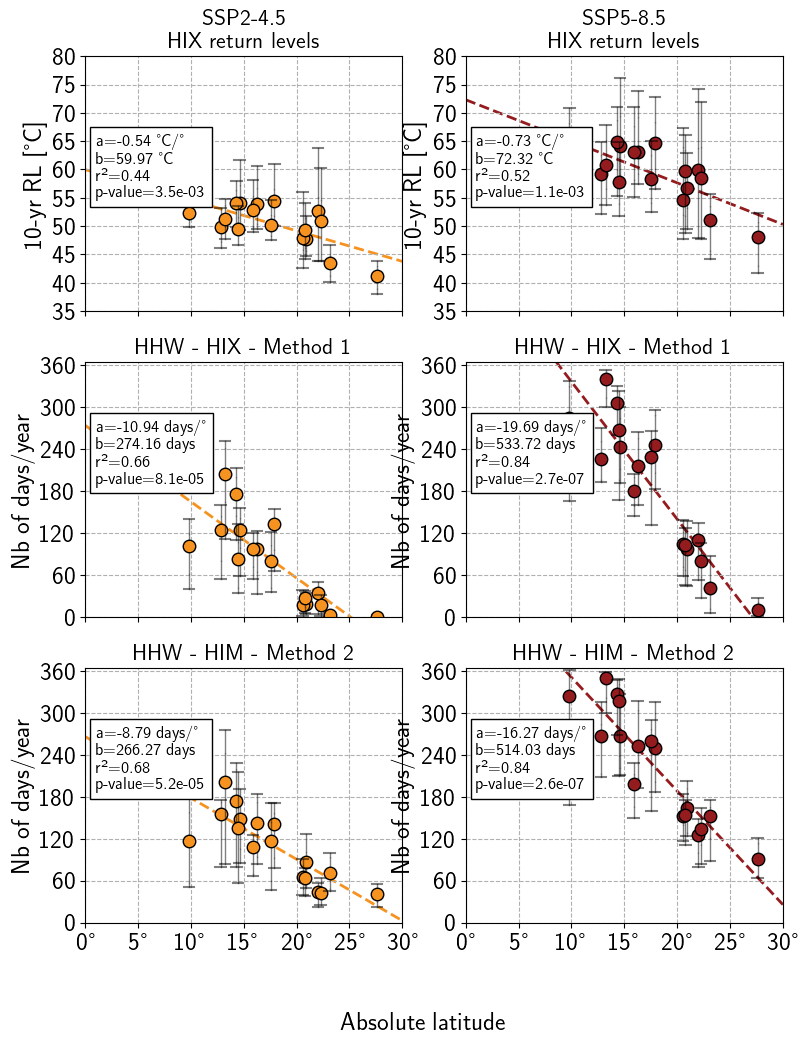

In [7]:
fig2()

### Figure S13 : Like Figure 2 but with French Guiana added

In [10]:
def figS13():
    
    
    '''
    This method generates a figure in six subplots.
    10-y return levels for the period 2090-2100
    Humid heatwave frequency (days/year) according to Method 1 and Method 2 (see the paper), for period 2090-2100
    Two scenarios : SSP2-4.5 and SSP5-8.5
    Here the results for 17 islands stations + 4 stations of French Guiana are displayed.
    
    '''
    

    latitudes=[3.640167,3.890667,4.822333,5.4855,9.806,12.8055,13.2398,14.3078,14.456833,
           14.595333,15.8876,16.264,17.555167,17.9015,20.558667,20.777667,
           20.892167,22.017333,22.276009,23.130167,27.618333]

    Scenarios=["ssp245","ssp585"]


    rc('text', usetex=True)# text in LateX
    
    all_stations=["Maripasoula","Saint-Georges","Cayenne-Matoury","Saint-Laurent",
                  "Hiva-oa","Pamandzi","Hihifo","Maopoopo","Takaroa","Lamentin","Tromelin",
                 "Raizet","Faaa","Saint-Barthelemy","Koumac","Ouanaham","Gillot","Tontouta","Noumea",
                 "Mangareva","Rapa"] #island stations + French Guiana
    
    
    fig, axs = plt.subplots(nrows=3, ncols=2,
                                sharex=True,
                                #sharey=True,
                                figsize=(9,11.25))

    for scenario in Scenarios:
        
        
        #parameters for all subplots
        
        if scenario == 'ssp245':
            ind_col=0
            color=(247/256,148/256,32/256)
            scenario_title="SSP2-4.5"
            
        else:
            ind_col=1
            color=(149/256,27/256,30/256)
            scenario_title="SSP5-8.5"
            
            
        dirin="./heatwaves/" # folder for humid heatwave properties -- GCMs
        dirin_gev="./GEV/" # folder for return levels -- GCMs
        
        
            
        # parameters for the first row -- HHE
        
        axs[0][ind_col].set_xlim([0,30])
        axs[0][ind_col].set_xticks([0,5,10,15,20,25,30])
        axs[0][ind_col].set_xticklabels(["0°","5°","10°","15°","20°","25°","30°"],fontsize=18)        

        axs[0][ind_col].grid(ls='--')
        axs[0][ind_col].set_yticks([35,40,45,50,55,60,65,70,75,80])
        axs[0][ind_col].set_yticklabels([35,40,45,50,55,60,65,70,75,80],fontsize=18)        
        
        axs[0][ind_col].set_ylim(bottom=35)
            
        axs[0][ind_col].set_ylabel("10-yr RL [°C]",fontsize=18)
        
        axs[0][ind_col].set_title(scenario_title+"\nHIX return levels",fontsize=16)
        
        
        
        
        ### FIRST ROW -- HHE
        
        # to store median values
        medians=np.empty((len(latitudes),))
        
        
        # to order stations
        i=0
                
        for station in all_stations:
            
            
            
            #get multimodel 10-y return levels mean, averaged over 2090-2100, and its median
            RL_mod=np.nanmean(np.load(dirin_gev+'10y-RL_HI_1990-2100_'+scenario+'_'+station+'_all_samples.npy')[:,-11:-1],axis=1)
            
            medians[i]=np.nanmedian(RL_mod)
            
            
            ### PLOT
            bplot=axs[0][ind_col].boxplot(RL_mod[~np.isnan(RL_mod)],whis=(10,90),positions=np.array([latitudes[i]]), patch_artist=True,showfliers=False,widths=0.0,capprops={'alpha':0.5,'linewidth':1.5},
                      whiskerprops={'alpha':0.5,'linewidth':1},boxprops={'alpha':0.5,'linewidth':1},capwidths=1,zorder=2)
            
            axs[0][ind_col].plot(np.array([latitudes[i]]),np.nanmedian(RL_mod),color=color,marker='o',markersize=9,mec='k',linestyle='',label='medians',zorder=2)

            i+=1
        
        
        # Linear regression over medians
        a, b, r, p_value, std_err=sc.linregress(np.array(latitudes),medians)
        
        print(medians)
        
        ### PLOT
        axs[0][ind_col].plot(np.arange(-10,35,0.01),a*np.arange(-10,35,0.01)+b,color=color,linewidth=2,linestyle='--',label='lin. reg.',zorder=1)
        
        # PLOT linear fit parameters and significance
        axs[0][ind_col].text(1,55,'a={:.2f} °C/°\nb={:.2f} °C\nr²={:.2f}\np-value={:.1e}'.format(np.round(a,2),np.round(b,2),np.round(r**2,2),p_value),bbox=dict(facecolor='white'),fontsize=12)
        
        
        
        
        
        ### SECOND ROW -- HHW1
        
        
        #days/year under HHW1 conditions over islands only, period 2090-2100
        nbdays=np.load(dirin+"nb_days_over3days_over_NOAA_danger_threshold_s2_HIX_"+scenario+"_2090-2100.npy")[:,:] 

        
        # to store median values
        medians=np.empty((len(latitudes),))
        
        
        # to order stations
        i=0
        
        for station in all_stations:
                
            
            # PLOT
            
            bplot=axs[1][ind_col].boxplot(nbdays[:,i],whis=(10,90),positions=np.array([latitudes[i]]), patch_artist=True,showfliers=False,widths=0.0,capprops={'alpha':0.5,'linewidth':1.5},
                      whiskerprops={'alpha':0.5,'linewidth':1},boxprops={'alpha':0.5,'linewidth':1},capwidths=1,zorder=2)         
            
            axs[1][ind_col].plot(np.array([latitudes[i]]),np.nanmedian(nbdays[:,i]),color=color,marker='o',markersize=9,mec='k',linestyle='',
                                 #label='medians',
                                 zorder=2)
            
            medians[i]=np.nanmedian(nbdays[:,i])
            
            i+=1
        
        
        axs[1][ind_col].grid(ls='--')
        
        
        # Linear regression on multimodel medians
        a, b, r, p_value, std_err=sc.linregress(np.array(latitudes), medians)
        
        # PLOT
        axs[1][ind_col].plot(np.arange(-10,35,0.01),a*np.arange(-10,35,0.01)+b,color=color,linewidth=2,linestyle='--',label='lin. reg.',zorder=1)
        
        # Parameters of the linear fit and significance
        axs[1][ind_col].text(1,190,'a={:.2f} days/°\nb={:.2f} days\nr²={:.2f}\np-value={:.1e}'.format(np.round(a,2),np.round(b,2),np.round(r**2,2),p_value),bbox=dict(facecolor='white'),fontsize=12)

        
        axs[1][ind_col].set_xticks([0,5,10,15,20,25,30])
        axs[1][ind_col].set_xticklabels(["0°","5°","10°","15°","20°","25°","30°"],fontsize=18)
        axs[1][ind_col].set_ylim([0,365])
        axs[1][ind_col].set_yticks([0,60,120,180,240,300,360])
        axs[1][ind_col].set_yticklabels([0,60,120,180,240,300,360],fontsize=18)
        axs[1][ind_col].set_ylabel("Nb of days/year",fontsize=18)
        
        axs[1][ind_col].set_title("HHW - HIX - Method 1",fontsize=16)
        
        
        
        
        
        ### THIRD ROW -- HHW2
        
        
        #days/year under HHW2 conditions over islands only, period 2090-2100

        nbdays=np.load(dirin+"nb_days_over3days_"+scenario+"_2090-2100.npy")[:,:] 
    
        # to store median values
        medians=np.empty((len(latitudes),))
        
        
        # to order stations
        i=0
        
        for station in all_stations:
                
                
                #PLOT
                bplot=axs[2][ind_col].boxplot(nbdays[:,i],whis=(10,90),positions=np.array([latitudes[i]]), patch_artist=True,showfliers=False,widths=0.0,capprops={'alpha':0.5,'linewidth':1.5},
                      whiskerprops={'alpha':0.5,'linewidth':1},boxprops={'alpha':0.5,'linewidth':1},capwidths=1,zorder=2)            #axs.plot(np.array([pos[i]]),np.array([intensity_obs]),color='k',marker='o', linestyle='',label='OBS (1990-2014)') 
            
                axs[2][ind_col].plot(np.array([latitudes[i]]),np.nanmedian(nbdays[:,i]),color=color,marker='o',markersize=9,mec='k',linestyle='',label='medians',zorder=2)
            
                medians[i]=np.nanmedian(nbdays[:,i])
            
                i+=1
        
        
        axs[2][ind_col].grid(ls='--')
        
        # Linear regression over multimodel medians
        a, b, r, p_value, std_err=sc.linregress(np.array(latitudes), medians)
        
        #PLOT
        axs[2][ind_col].plot(np.arange(-10,35,0.01),a*np.arange(-10,35,0.01)+b,color=color,linewidth=2,linestyle='--',label='lin. reg.',zorder=1)
        
        # Parameters of the linear fit and significance
        axs[2][ind_col].text(1,190,'a={:.2f} days/°\nb={:.2f} days\nr²={:.2f}\np-value={:.1e}'.format(np.round(a,2),np.round(b,2),np.round(r**2,2),p_value),bbox=dict(facecolor='white'),fontsize=12)

        
        axs[2][ind_col].set_xticks([0,5,10,15,20,25,30])
        axs[2][ind_col].set_xticklabels(["0°","5°","10°","15°","20°","25°","30°"],fontsize=18)
        axs[2][ind_col].set_ylim([0,365])
        axs[2][ind_col].set_yticks([0,60,120,180,240,300,360])
        axs[2][ind_col].set_yticklabels([0,60,120,180,240,300,360],fontsize=18)
        axs[2][ind_col].set_ylabel("Nb of days/year",fontsize=18)
            
        axs[2][ind_col].set_title("HHW - HIM - Method 2",fontsize=16)

    
    #x-axis common label
    fig.supxlabel("Absolute latitude",fontsize=18)

    
    #saving
    fig.savefig(dirout+"/figS13.svg",bbox_inches='tight',transparent=False,dpi=400) # Enregistrement du graphique en format png
    fig.savefig(dirout+"/figS13.png",bbox_inches='tight',transparent=False,dpi=400)

/tmp/ipykernel_55155/1521129585.py:77: RuntimeWarning: Mean of empty slice
  RL_mod=np.nanmean(np.load(dirin_gev+'RL_RP_HIX/10y-RL_HI_1990-2100_'+scenario+'_'+station+'_all_samples.npy')[:,-11:-1],axis=1)
/tmp/ipykernel_55155/1521129585.py:77: RuntimeWarning: Mean of empty slice
  RL_mod=np.nanmean(np.load(dirin_gev+'RL_RP_HIX/10y-RL_HI_1990-2100_'+scenario+'_'+station+'_all_samples.npy')[:,-11:-1],axis=1)
/tmp/ipykernel_55155/1521129585.py:77: RuntimeWarning: Mean of empty slice
  RL_mod=np.nanmean(np.load(dirin_gev+'RL_RP_HIX/10y-RL_HI_1990-2100_'+scenario+'_'+station+'_all_samples.npy')[:,-11:-1],axis=1)
/tmp/ipykernel_55155/1521129585.py:77: RuntimeWarning: Mean of empty slice
  RL_mod=np.nanmean(np.load(dirin_gev+'RL_RP_HIX/10y-RL_HI_1990-2100_'+scenario+'_'+station+'_all_samples.npy')[:,-11:-1],axis=1)
/tmp/ipykernel_55155/1521129585.py:77: RuntimeWarning: Mean of empty slice
  RL_mod=np.nanmean(np.load(dirin_gev+'RL_RP_HIX/10y-RL_HI_1990-2100_'+scenario+'_'+station+'_all_samples

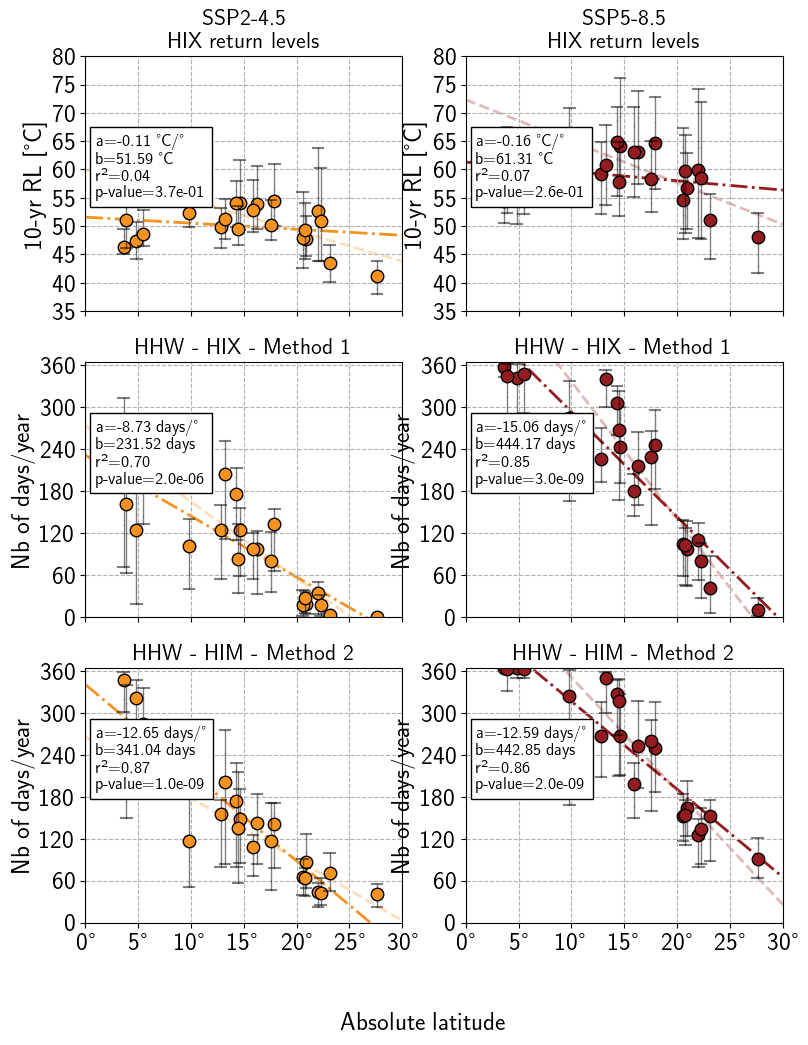

In [11]:
figS13()

### Figure S9 : Same as Figure 2, but in Historical period (1990-2000) 

In [12]:
def figS9():
    
        '''
    This method generates a figure in three subplots.
    10-y return levels for the period 1990-2000
    Humid heatwave frequency (days/year) according to Method 1 and Method 2 (see the paper), for period 1990-2000
    Here the results for 17 islands stations.
    
    '''
    
        latitudes=[9.806,12.8055,13.2398,14.3078,14.456833,14.595333,15.8876,16.264,17.555167,17.9015,20.558667,20.777667,
           20.892167,22.017333,22.276009,23.130167,27.618333]


        rc('text', usetex=True)# text in LateX
    
        all_stations=["Hiva-oa","Pamandzi","Hihifo","Maopoopo","Takaroa","Lamentin","Tromelin",
                 "Raizet","Faaa","Saint-Barthelemy","Koumac","Ouanaham","Gillot","Tontouta","Noumea",
                 "Mangareva","Rapa"] #island stations
    
    
        fig, axs = plt.subplots(nrows=3, ncols=1,
                                sharex=True,
                                #sharey=True,
                                figsize=(4, 11.25))

        scenario='hist'
        
        # parameters for all subplots 
        if scenario == "hist":
            color="lightgrey"
            scenario_title="Historical"
    
        
        dirin="./heatwaves/" # folder for humid heatwave properties -- GCMs
        dirin_gev="./GEV/" # folder for return levels -- GCMs
        
        
        
        # FIRST ROW -- HHE
        
        axs[0].set_xlim([0,30])
        axs[0].set_xticks([0,5,10,15,20,25,30])
        axs[0].set_xticklabels(["0°","5°","10°","15°","20°","25°","30°"],fontsize=18)        

        axs[0].grid(ls='--')
        axs[0].set_yticks([35,40,45,50,55,60,65,70,75,80])
        axs[0].set_yticklabels([35,40,45,50,55,60,65,70,75,80],fontsize=18)        
        
        axs[0].set_ylim(bottom=35)
            
        axs[0].set_ylabel("10-yr RL [°C]",fontsize=18)
        
        axs[0].set_title(scenario_title+"\nHIX return levels",fontsize=16)
        
        
        # to store median values
        medians=np.empty((len(latitudes),))
        
        
        # to order stations
        i=0
                
        for station in all_stations:
            

            if scenario == "hist":
                
                #get multimodel 10-y return levels mean, averaged over 1990-2000, and its median
                RL_mod=np.nanmean(np.load(dirin_gev+'/10y-RL_HI_1990-2100_ssp245_'+station+'_all_samples.npy')[:,:10],axis=1)

           
            medians[i]=np.nanmedian(RL_mod)
            
            # PLOT
            bplot=axs[0].boxplot(RL_mod[~np.isnan(RL_mod)],whis=(10,90),positions=np.array([latitudes[i]]), patch_artist=True,showfliers=False,widths=0.0,capprops={'alpha':0.5,'linewidth':1.5},
                      whiskerprops={'alpha':0.5,'linewidth':1},boxprops={'alpha':0.5,'linewidth':1},capwidths=1,zorder=2)
            
            axs[0].plot(np.array([latitudes[i]]),np.nanmedian(RL_mod),color=color,marker='o',markersize=9,mec='k',linestyle='',label='medians',zorder=2)


            i+=1
        
        # Linear fit
        
        a, b, r, p_value, std_err=sc.linregress(np.array(latitudes),medians)
        axs[0].plot(np.arange(-10,35,0.01),a*np.arange(-10,35,0.01)+b,color=color,linewidth=2,linestyle='--',label='lin. reg.',zorder=1)
        
        
        # Text for linear fit parameters
        axs[0].text(1,55,'a={:.2f} °C/°\nb={:.2f} °C\nr²={:.2f}\np-value={:.1e}'.format(np.round(a,2),np.round(b,2),np.round(r**2,2),p_value),bbox=dict(facecolor='white'),fontsize=12)
        
        
        
        
        
        # SECOND ROW - HHW1
        
        if scenario == 'hist':
        
            nbdays=np.load(dirin+"/nb_days_over3days_over_NOAA_danger_threshold_s2_HIX_"+scenario+"_1990-2000.npy")[:,4:] 
        
        
        # to store median values
        medians=np.empty((len(latitudes),))
        
        
        # to order stations
        i=0
        
        for station in all_stations:
                
            # PLOT
            bplot=axs[1].boxplot(nbdays[:,i],whis=(10,90),positions=np.array([latitudes[i]]), patch_artist=True,showfliers=False,widths=0.0,capprops={'alpha':0.5,'linewidth':1.5},
                      whiskerprops={'alpha':0.5,'linewidth':1},boxprops={'alpha':0.5,'linewidth':1},capwidths=1,zorder=2)            #axs.plot(np.array([pos[i]]),np.array([intensity_obs]),color='k',marker='o', linestyle='',label='OBS (1990-2014)') 
            
            axs[1].plot(np.array([latitudes[i]]),np.nanmedian(nbdays[:,i]),color=color,marker='o',markersize=9,mec='k',linestyle='',
                                 #label='medians',
                                 zorder=2)
            
            medians[i]=np.nanmedian(nbdays[:,i])
            
            i+=1
        
        
        axs[1].grid(ls='--')
        
        # linear fit on medians
        a, b, r, p_value, std_err=sc.linregress(np.array(latitudes), medians)
        # PLOT
        axs[1].plot(np.arange(-10,35,0.01),a*np.arange(-10,35,0.01)+b,color=color,linewidth=2,linestyle='--',label='lin. reg.',zorder=1)
        
        # display linear fit parameters
        axs[1].text(1,190,'a={:.2f} days/°\nb={:.2f} days\nr²={:.2f}\np-value={:.1e}'.format(np.round(a,2),np.round(b,2),np.round(r**2,2),p_value),bbox=dict(facecolor='white'),fontsize=12)

        
        axs[1].set_xticks([0,5,10,15,20,25,30])
        axs[1].set_xticklabels(["0°","5°","10°","15°","20°","25°","30°"],fontsize=18)
        axs[1].set_ylim([0,365])
        axs[1].set_yticks([0,60,120,180,240,300,360])
        axs[1].set_yticklabels([0,60,120,180,240,300,360],fontsize=18)
        axs[1].set_ylabel("Nb of days/year",fontsize=16)
        
        axs[1].set_title("HHW - HIX - Method 1",fontsize=16)
                
        
        
        
        # THIRD ROW -- HHW2
        
        nbdays=np.load(dirin+"/nb_days_over3days_hist_1990-2000.npy")[:,4:] 
    
        # to store median values
        medians=np.empty((len(latitudes),))
        
        
        # to order stations
        i=0
        
        for station in all_stations:
                
                # PLOT
                bplot=axs[2].boxplot(nbdays[:,i],whis=(10,90),positions=np.array([latitudes[i]]), patch_artist=True,showfliers=False,widths=0.0,capprops={'alpha':0.5,'linewidth':1.5},
                      whiskerprops={'alpha':0.5,'linewidth':1},boxprops={'alpha':0.5,'linewidth':1},capwidths=1,zorder=2)            #axs.plot(np.array([pos[i]]),np.array([intensity_obs]),color='k',marker='o', linestyle='',label='OBS (1990-2014)') 
            
                axs[2].plot(np.array([latitudes[i]]),np.nanmedian(nbdays[:,i]),color=color,marker='o',markersize=9,mec='k',linestyle='',label='medians',zorder=2)
            
                medians[i]=np.nanmedian(nbdays[:,i])
            
                i+=1
        
        
        axs[2].grid(ls='--')
        
        # linear fit
        a, b, r, p_value, std_err=sc.linregress(np.array(latitudes), medians)
        
        #PLOT
        axs[2].plot(np.arange(-10,35,0.01),a*np.arange(-10,35,0.01)+b,color=color,linewidth=2,linestyle='--',label='lin. reg.',zorder=1)
        
        
        #display linear fit parameters
        axs[2].text(1,190,'a={:.2f} days/°\nb={:.2f} days\nr²={:.2f}\np-value={:.1e}'.format(np.round(a,2),np.round(b,2),np.round(r**2,2),p_value),bbox=dict(facecolor='white'),fontsize=12)

        
        axs[2].set_xticks([0,5,10,15,20,25,30])
        axs[2].set_xticklabels(["0°","5°","10°","15°","20°","25°","30°"],fontsize=18)
        axs[2].set_ylim([0,365])
        axs[2].set_yticks([0,60,120,180,240,300,360])
        axs[2].set_yticklabels([0,60,120,180,240,300,360],fontsize=18)
        axs[2].set_ylabel("Nb of days/year",fontsize=18)
            
        axs[2].set_title("HHW - HIM - Method 2",fontsize=16)

        fig.supxlabel("Absolute latitude",fontsize=18)
        
        
        # saving
        fig.savefig(dirout+"/figS9.svg",bbox_inches='tight',transparent=False,dpi=400) # Enregistrement du graphique en format png
        fig.savefig(dirout+"/figS9.png",bbox_inches='tight',transparent=False,dpi=400)
        

/tmp/ipykernel_52532/1486588843.py:84: RuntimeWarning: Mean of empty slice
  RL_mod=np.nanmean(np.load(dirin_gev+'RL_RP_HIX/10y-RL_HI_1990-2100_ssp245_'+station+'_all_samples.npy')[:,:10],axis=1)
/tmp/ipykernel_52532/1486588843.py:84: RuntimeWarning: Mean of empty slice
  RL_mod=np.nanmean(np.load(dirin_gev+'RL_RP_HIX/10y-RL_HI_1990-2100_ssp245_'+station+'_all_samples.npy')[:,:10],axis=1)
/tmp/ipykernel_52532/1486588843.py:84: RuntimeWarning: Mean of empty slice
  RL_mod=np.nanmean(np.load(dirin_gev+'RL_RP_HIX/10y-RL_HI_1990-2100_ssp245_'+station+'_all_samples.npy')[:,:10],axis=1)
/tmp/ipykernel_52532/1486588843.py:84: RuntimeWarning: Mean of empty slice
  RL_mod=np.nanmean(np.load(dirin_gev+'RL_RP_HIX/10y-RL_HI_1990-2100_ssp245_'+station+'_all_samples.npy')[:,:10],axis=1)


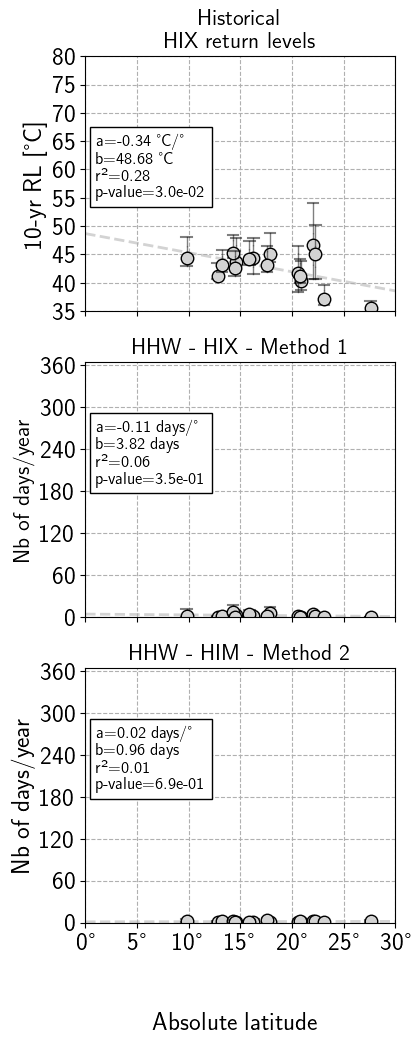

In [13]:
figS9()